In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import requests
from io import StringIO
import yfinance as yf
import random
import math

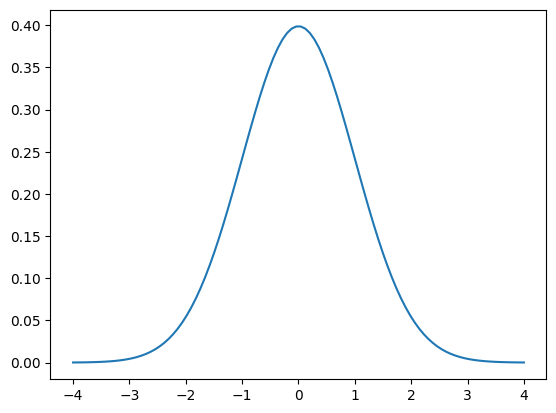

In [3]:
# Numerical Solution of SDE through computer experiments. 

# Chapter 1.

# Problem 1.1.1 Generate a Gaussian density function on the interval [-4,4]

def gauss(z,mu,sigma):
    return (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(z-mu)**2/(2*sigma**2))

xData = np.linspace(-4,4,100)
yData = gauss(xData,0,1)

plt.plot(xData,yData)

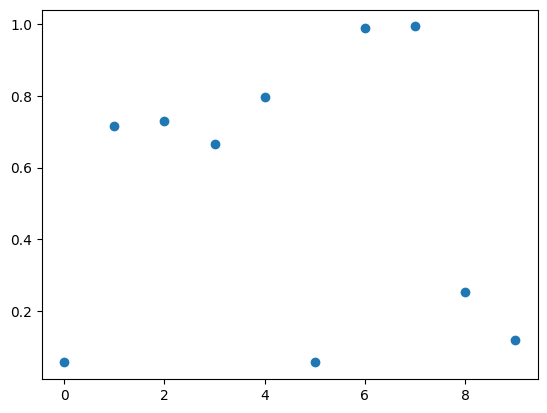

In [4]:
# Problem 1.2.1

# use a random number generator to generate a sequence of 10 independent U(0,1) (i.e., unit interval) uniformly distributed pseudo-random numbers.

list121 = []
xData121 = []

for i in range(10):
    list121.append(random.random())
    xData121.append(i)

plt.plot(xData121,list121,'o')


24


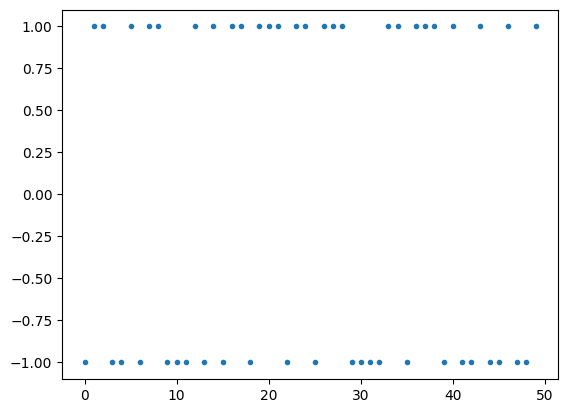

7 9


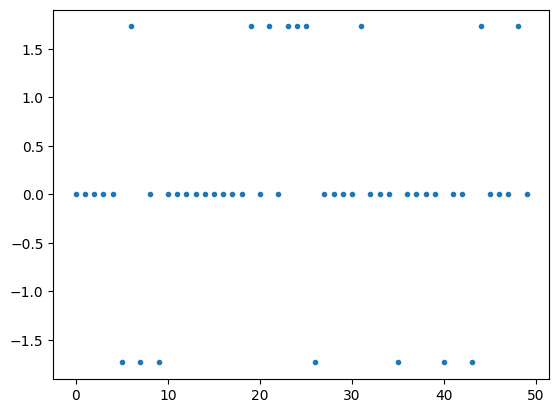

In [5]:
# Problem 1.2.2 

# Generate 50 independent two-point pseudo-random numbers, where the outcomes x1 = -1 and x2 = 1 occur with probabilities p1 = p2 = 1/2

list122 = []
xData122 = []
count = 0

for i in range(50):
    rand = random.random()
    if not(rand > 0.5):
        list122.append(-1)
        count = count+1
    else:
        list122.append(1)
    xData122.append(i)

print(count)
plt.plot(xData122,list122,'.')
plt.show()

# Exericise 1.2.2 

# Generate 50 independent three-point distrubuted pseudo-random numbers, where the outcomes x1 = -sqrt(3), x2 = sqrt(3) with prob 1/6, x3 = 0 with prob 2/3

list122 = []
xData122 = []
count1 = 0
count2 = 0

for i in range(50):
    rand = random.random()
    if rand <= 1/6:
        list122.append(-np.sqrt(3))
        count1 = count1+1
    elif 1/6 < rand <= 1/3:
        list122.append(np.sqrt(3))
        count2 = count2+1
    else:
        list122.append(0)
    xData122.append(i)

print(count1,count2)
plt.plot(xData122,list122,'.')


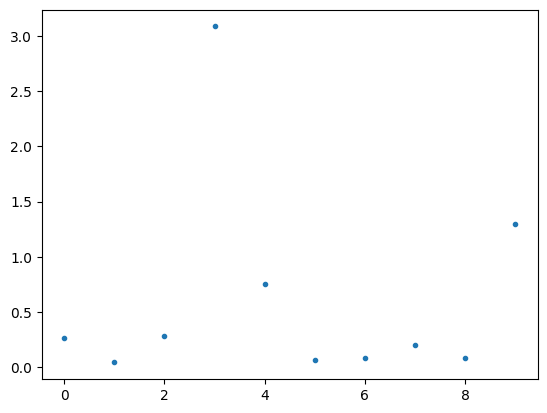

In [6]:
# Problem 1.2.3

# Generate a sequence of 10 independent exponentially distrubuted pseudo-random numbers with parameter lambda = 2.0. Note that we apply the inverse transformation since the distribution is on the event space. In this case, we take the outcome and back-generate the positions of the points to get the below set. 

list123 = []
xData123 = []

for i in range(10):
    rand = random.random()
    if rand != 1:
        x = - np.log(1-rand)/2
        list123.append(x)
    else:
        list123.append(0)
    xData123.append(i)

plt.plot(xData123,list123,'.')

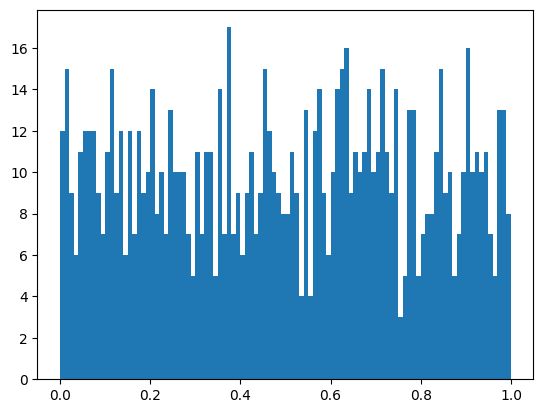

0.4975844235237409 0.08412929190207329


In [7]:
# Problem 1.3.1

# Generate 10^3 uniformly distributed U(0,1) random numbers. Partition the interval into subintervals of length 0.01. Plot a histogram with the number of outcomes falling within a given subinterval. Calculate the sample mean and sample variance. Discuss.

list131 = []

for i in range(10**3):
    list131.append(random.random())

plt.hist(list131,bins=100)
plt.show()

mean = 0
var = 0

for i in list131:
    mean = mean + i

mean = mean/10**3

for i in list131:
    var = var + (i - mean)**2

var = var/(10**3-1)

print(mean,var)

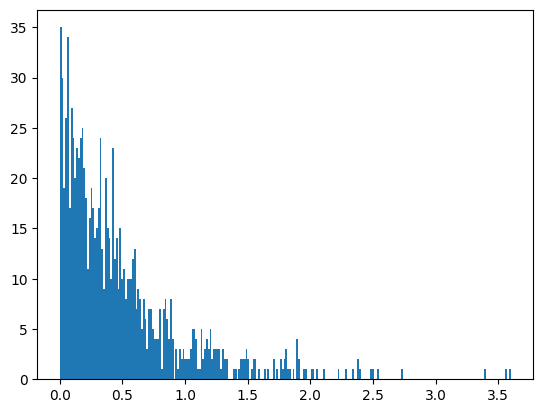

0.48303549531998613 0.24580490980422856


In [8]:
# Problem 1.3.2

# Do the same again but now for the exponential distribution

list132 = []
xData132 = []

for i in range(10**3):
    rand = random.random()
    x = -np.log(1-rand)/2
    list132.append(x)
    xData132.append(i)

plt.hist(list132,250)
plt.show()

mean = 0
var = 0

for i in list132:
    mean = mean + i

mean = mean/10**3

for i in list132:
    var = var + (i - mean)**2

var = var/(10**3-1)

print(mean,var)

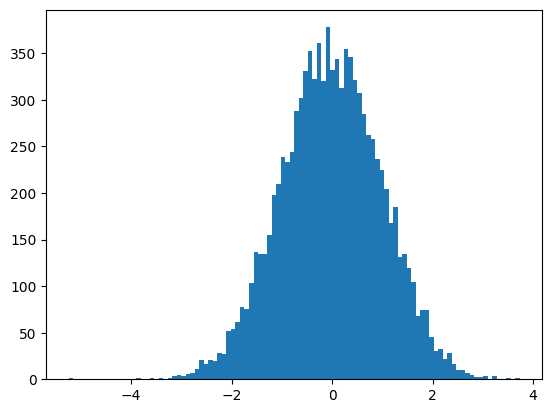

In [ ]:
# Random: checking to see how Gaussian distributions work

listTest = []

for i in range(10000):
    x = np.random.normal()
    listTest.append(x)

plt.hist(listTest,100)
plt.show()

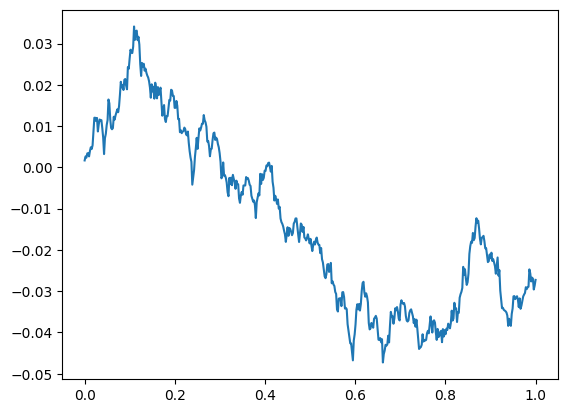

In [32]:
# Problem 1.7.1

# Generate and plot the linearly interpolated tajectory of a Wiener proceess on [0,1] at time intervals t_k = k2^{-9} for k \in {0, 2^9} assuming the distribution is Gaussian between steps.

kTop = 2**9
xData171 = np.linspace(0,1,2**9)
yData171 = []
randWalk = 0

for x in xData171:
    randWalk = randWalk + np.random.normal(loc=0, scale=2**-9)
    yData171.append(randWalk)

# print(yData171)

plt.plot(xData171,yData171)
plt.show()

512 <class 'list'> 512 <class 'numpy.ndarray'> 512 512


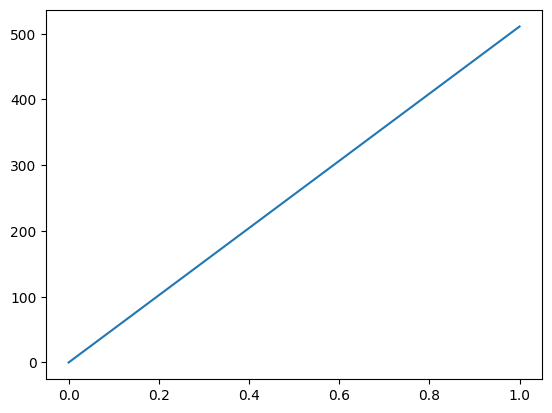

In [ ]:
# Random: you can plot with x and y axes being different data types as long as they have the same length and are 'like' lists

yDataListTest = list(range(0,2**9))
print(len(yDataListTest),type(yDataListTest),len(xData171),type(xData171),len(yData171),kTop)

plt.plot(xData171,yDataListTest)


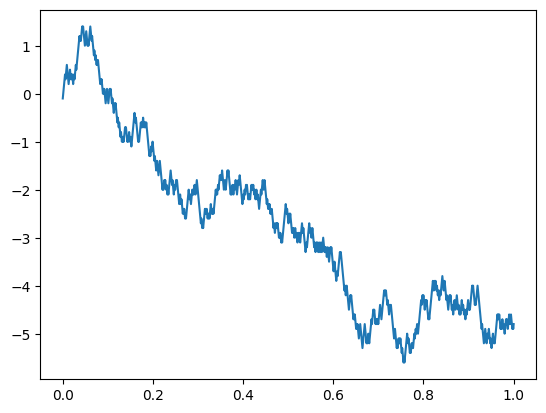

In [47]:
# Problem 1.7.2 

# Do the same but now in [0,1] with equally probable steps +/- dt. Partition [0,1] into 100 steps and dt = 1/sqrt(100) = 1/10.

def twoPointDist(n):
    x = random.random()
    if x <= 0.5:
        return -1/np.sqrt(n)
    else:
        return 1/np.sqrt(n)
    
def binarySamplePath(n):
    xData172 = np.linspace(0,1,n)
    yData172 = []
    xStep = 0

    for x in xData172:
        dx = twoPointDist(100)
        xStep = xStep + dx
        yData172.append(xStep)

    return xData172, yData172

x172 = binarySamplePath(1000)[0]
y172 = binarySamplePath(1000)[1]

plt.plot(x172,y172)
plt.show()

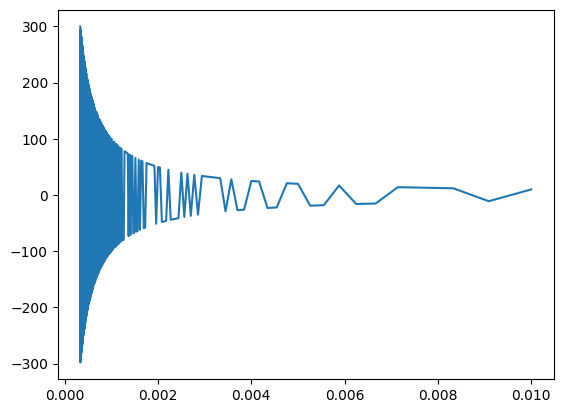

In [ ]:
# Problem 1.7.4 (run 1.7.2 first)

# Now try to evaluate the derivative of this function at t = 0.5 by numerically calculating the derivative for successively smaller areas around 0.5.

deriv174 = []
hVals174 = []

for n in range(100,3010,10):
    yData174 = binarySamplePath(n)[1]
    index = math.floor(n/2)
    yDiff = (yData174[index+1]-yData174[index])/(1/n)
    deriv174.append(yDiff)
    hVals174.append(1/n)

plt.plot(hVals174,deriv174)

# Importantly, notice that the derivative diverges in a wild way as one tries to calculate the derivative in terms of GIVEN values, so we need to do something more general.